<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/MachineLearningforBeginners_Part_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - **Topics**

1. Introduction - ML, Types,SL,UL, Regression , Classification

What will be the approach to learn

Maths ?

Python ?

2. Weight , Bias , Feature(Slope, intercept, target and independent variable)

3. Linear Regression Problem - Supervised Learning Regression Problem

4. Error - Predicted Vs Tested Value

5. A little maths on derivative

7. Gradient Descent and Cost Function

8. Logistic Regression - Solving Supervised Learning Classification problem

9. Performance Evaluation




# Machine Learning - Introduction

# Features, Weights and Bias


Let's solve a basic maths problem:
suppose you go to supermarket one day and find the melons of different sizes and weights

melon_data = [(1, 2), (2, 4), (3, 6),(4, 8), (5, 10]

melon_price=2*melon_wt

let's say  you need to pay parking of the place as $2 weather you buy or not


melon_price=2*melon_wt+2

If I ask you the price of melon weighted 20 kg, you will substitute in equation:

melon_price_20=2*20+2

We can also draw a graph with and without tax .We can predict value from the line.








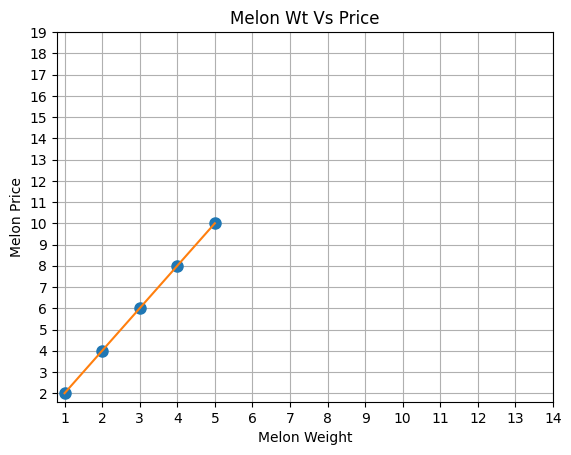

In [ ]:
import matplotlib.pyplot as plt

# Sample list of tuples containing coordinates
coordinates = [(1, 2), (2, 4), (3, 6), (4, 8), (5, 10)]

# Extract x and y coordinates from the list of tuples
x_values = [coord[0] for coord in coordinates]
y_values = [coord[1] for coord in coordinates]

# Plot the points
plt.plot(x_values, y_values, marker='o', linestyle='', markersize=8)

# Draw lines connecting the points
plt.plot(x_values, y_values, linestyle='-', marker='')

# Add labels and title
# Customize x-ticks to display integers
plt.xticks(range(min(x_values), max(x_values)+10))
plt.yticks(range(min(y_values), max(x_values)+15))

# Add labels and title
plt.xlabel('Melon Weight')
plt.ylabel('Melon Price')
plt.title('Melon Wt Vs Price')
# Show the plot
plt.grid(True)
plt.show()

[Inspiration: Towards Data Science](https://towardsdatascience.com/machine-learning-simple-linear-regression-with-python-f04ecfdadc13)

Linear equation in general be written as

y=mx+b

m-> slope or weight

b-> bias

x, y are variables are

when we are using it for machine learning, y is dependent variable(dependent on x in this case like melon price is dependendent on melon weight) or predicted variable or label or target variable or the variable
x is independent variable or feature



Now let's take some real life scenario where outcome/target variable is dependent on input feature but not with such a simple equation



[Salary Data Set](https://www.kaggle.com/datasets/anninasimon/employee-salary-dataset)






In [ ]:
import pandas as pd

# Convert dictionary to DataFrame
df = pd.DataFrame(melon_data,columns=["melon_weight", "price"])

# Display the DataFrame
print(df)

   melon_weight  price
0             1     50
1             2    100
2             3    140
3             4    180
4             5    220
5             6    250
6             7    300
7             8    340
8             9    380
9            10    390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   melon_weight  10 non-null     int64
 1   price         10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes
